<a href="https://colab.research.google.com/github/matsunagalab/lecture_ML/blob/main/machine_learning_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第11回 ニューラルネットワークその1: 基本的事項

## 曲線の回帰

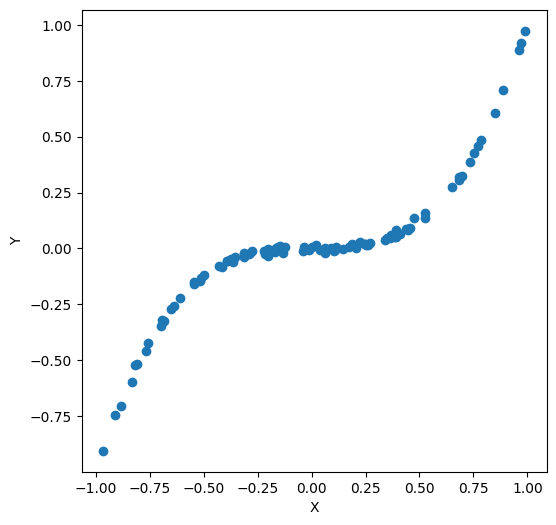

Epoch: 0, Loss: 0.11621282249689102
Epoch: 500, Loss: 0.0014199594734236598
Epoch: 1000, Loss: 0.0002237296139355749
Epoch: 1500, Loss: 0.0002044097491307184
Epoch: 2000, Loss: 0.00019968562992289662
Epoch: 2500, Loss: 0.00019755508401431143
Epoch: 3000, Loss: 0.00019668512686621398
Epoch: 3500, Loss: 0.00019644861458800733
Epoch: 4000, Loss: 0.0001963890390470624
Epoch: 4500, Loss: 0.000196322551346384
Epoch: 5000, Loss: 0.00019623839762061834
Epoch: 5500, Loss: 0.00019702472491189837
Epoch: 6000, Loss: 0.00019603149848990142
Epoch: 6500, Loss: 0.00019592444004956633
Epoch: 7000, Loss: 0.0001958180364454165
Epoch: 7500, Loss: 0.00019571284065023065
Epoch: 8000, Loss: 0.00015956844436004758
Epoch: 8500, Loss: 0.0001591488835401833
Epoch: 9000, Loss: 0.00015932969108689576
Epoch: 9500, Loss: 0.00015890446957200766


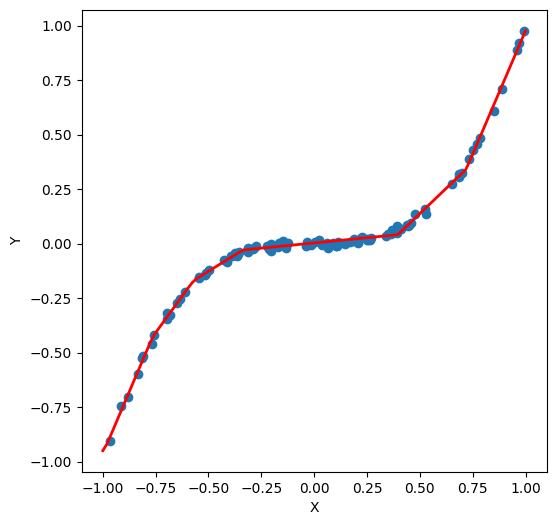

In [1]:
# Load required packages
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
import numpy as np

# Set the seed for reproducibility
np.random.seed(123)
torch.manual_seed(123)

# Data Generation
N = 100
X = 2.0 * (np.random.rand(N) - 0.5)
Y = X**3 + 0.01 * np.random.randn(N)

# Convert to Tensor
X = torch.from_numpy(X).float().view(N,1)
Y = torch.from_numpy(Y).float().view(N,1)

# Plot the data
plt.figure(figsize=(6,6))
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Define the model (Multi-Layer Perceptron)
model = nn.Sequential(
    nn.Linear(1,10),  # input layer
    nn.ReLU(),        # activation function
    nn.Linear(10,10), # intermediate layer
    nn.ReLU(),        # activation function
    nn.Linear(10,10), # intermediate layer
    nn.ReLU(),        # activation function
    nn.Linear(10,1)   # output layer
)

# Define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Training
EPOCHS = 10000
for epoch in range(EPOCHS):
    y_pred = model(X)         # forward pass
    loss = loss_fn(y_pred, Y) # compute loss
    optimizer.zero_grad()     # clear gradients
    loss.backward()           # backpropagation
    optimizer.step()          # update weights

    if epoch % 500 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")

# Plot the result
X_test = torch.linspace(-1,1,100).view(100,1)
Y_test = model(X_test)
plt.figure(figsize=(6,6))
plt.scatter(X.numpy(), Y.numpy())
plt.plot(X_test.detach().numpy(), Y_test.detach().numpy(), 'r', linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


## 線形分離不可能なデータの識別

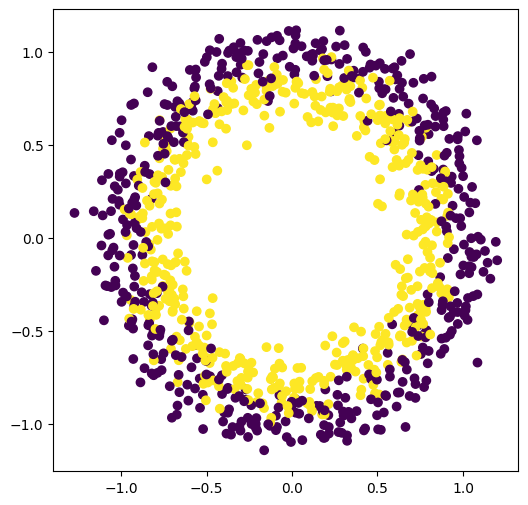

Epoch: 0, Loss: 0.7057525515556335
Epoch: 100, Loss: 0.36236703395843506
Epoch: 200, Loss: 0.35841161012649536
Epoch: 300, Loss: 0.3579632341861725
Epoch: 400, Loss: 0.357803076505661
Epoch: 500, Loss: 0.35764846205711365
Epoch: 600, Loss: 0.35751253366470337
Epoch: 700, Loss: 0.35743284225463867
Epoch: 800, Loss: 0.3573588728904724
Epoch: 900, Loss: 0.35733819007873535


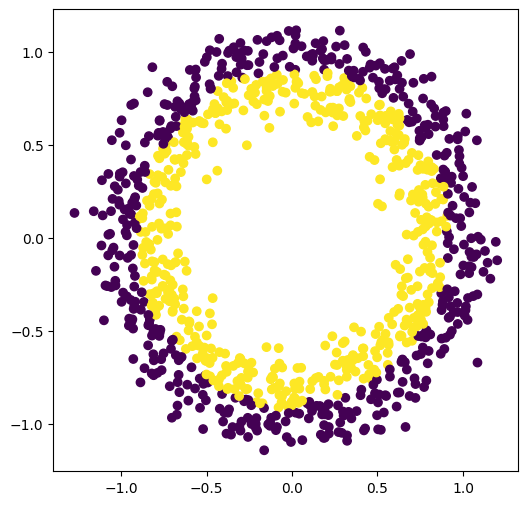

In [2]:
# Load required packages
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate non-linearly separable artificial 2D data
N_SAMPLES = 1000
X, y = make_circles(n_samples=N_SAMPLES, noise=0.1, random_state=123)

# Convert to Tensor
X, y = torch.tensor(X).float(), torch.tensor(y)

# Plot the data
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Define the model (Multi-Layer Perceptron)
model = nn.Sequential(
    nn.Linear(2,50), # input layer
    nn.ReLU(),       # activation function
    nn.Linear(50,2), # output layer
)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training
EPOCHS = 1000
for epoch in range(EPOCHS):
    out = model(X)           # forward pass
    loss = criterion(out, y) # compute the loss
    optimizer.zero_grad()    # clear gradients
    loss.backward()          # backpropagation
    optimizer.step()         # update weights

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")

# Prediction
y_pred = model(X)
_, predicted = torch.max(y_pred.data, 1)

# Plot the results
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=predicted)
plt.show()
